# Question 6

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# from numpy.random import random

from NeuralNetworkProj.Utilities.Normalization import MinMaxNormalization,ZeroMeanUnitVarianceNormalization
from NeuralNetworkProj.Functions.ActivationFunctions import ElementwiseActivation,sigmoid,sigmoid_derivative,relu,relu_derivative
from NeuralNetworkProj.Functions.LossFunctions import LossFunction,binary_cross_entropy_sigmoid,binary_cross_entropy_sigmoid_derivative
from NeuralNetworkProj.Layers.LinearLayer import LinearLayer
from NeuralNetworkProj.Utilities.DataTools import make_batches
from NeuralNetworkProj.Utilities.InitalizationFunctions import normal_initializer

               X_1          X_2           y
count   410.000000   410.000000  410.000000
mean   4895.705237  4973.234806    0.500000
std    2860.877356  3119.801712    0.500611
min      27.557777    29.069434    0.000000
25%    2341.140941  2124.504835    0.000000
50%    4987.225190  5701.130456    0.500000
75%    7303.607081  7762.583984    1.000000
max    9941.145899  9960.403013    1.000000


Text(0.5, 1.0, 'training data')

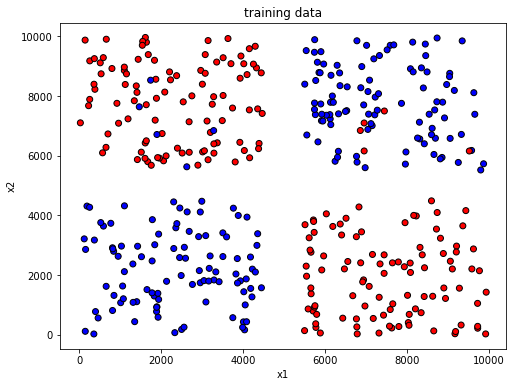

In [2]:
#import data
df_train = pd.read_csv('../data/train_data.csv')
df_val = pd.read_csv('../data/validate_data.csv')

#visualize the training data
cmap = ListedColormap(['red', 'blue', 'orange'])
print(df_train.describe())
fig1 = plt.figure(figsize=(8,6))
ax = fig1.add_subplot(111)
ax.scatter(df_train['X_1'], df_train['X_2'], c=df_train['y'], cmap=plt.cm.bwr, 
           edgecolors='k')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("training data")

               X_1          X_2          y
count    82.000000    82.000000  82.000000
mean   4961.359340  4977.447696   0.500000
std    2892.150581  2963.399147   0.503077
min     394.405868    11.396380   0.000000
25%    2413.972926  2438.593883   0.000000
50%    5006.236163  5558.908293   0.500000
75%    7527.921810  7459.296164   1.000000
max    9800.493432  9877.095439   1.000000


,X_1,X_2,y
0,2917.211242,3289.522533,0
1,1888.937716,781.528356,0
2,4188.521414,1554.476261,0
3,8145.555339,9804.066728,0
4,9584.488981,6176.337189,0


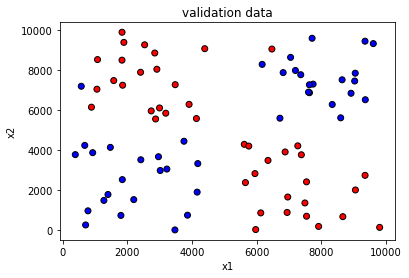

In [3]:
#visualize the training data
cmap = ListedColormap(['red', 'blue', 'orange'])
print(df_val.describe())
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(df_val['X_1'], df_val['X_2'], c=df_val['y'], cmap=plt.cm.bwr, 
            edgecolors='k')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("validation data")

df_train.head()

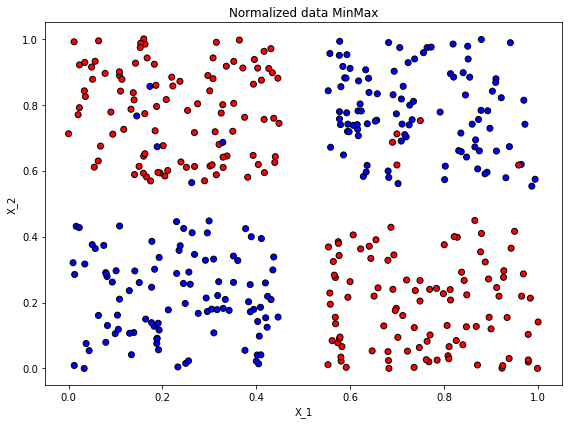

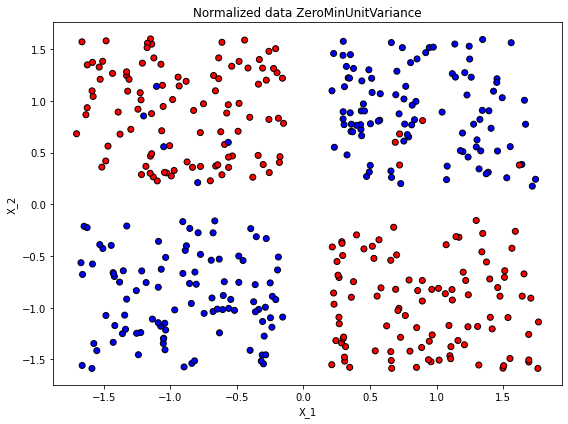

In [4]:
transforms = [MinMaxNormalization, ZeroMeanUnitVarianceNormalization]
transformNames=["MinMax","ZeroMinUnitVariance"]
step=0
for transform in transforms:
    normalized_data = transform(df_train[["X_1", "X_2"]])
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    # Plot also the training points
    ax.scatter(normalized_data["X_1"], normalized_data["X_2"], c=df_train['y'], cmap=plt.cm.bwr,
               edgecolors='k')
    plt.title("Normalized data "+transformNames[step])
    ax.set_xlabel("X_1")
    ax.set_ylabel("X_2")
    fig.tight_layout()
    step+=1


In [5]:
df_train.head()


,X_1,X_2,y
0,2917.211242,3289.522533,0
1,1888.937716,781.528356,0
2,4188.521414,1554.476261,0
3,8145.555339,9804.066728,0
4,9584.488981,6176.337189,0


for every sample we have 2 features so the input layer has a size 2 and two outputs because the result is the class the sample indentifies as and there are two classes.

## Define activation functions

In [6]:
def activation(x,func=relu):
  return func(x)

def activation_derivative(x,chain_grad,func=relu_derivative):
  return func(x,chain_grad)


## define initializer type

In [7]:
initializer=normal_initializer

## define network structure and loss fucntion

In [8]:
network = list()
input_layer1 = 2
output_layer1=10

input_layer2 = output_layer1
output_layer2 = 10

hidden_layer1=LinearLayer(input_layer1,output_layer1,initializer,False)
# activation1=ElementwiseActivation(relu,relu_derivative)
activation1=ElementwiseActivation(activation,activation_derivative)

hidden_layer2=LinearLayer(input_layer2,output_layer2,initializer,False)
# activation2=ElementwiseActivation(relu,relu_derivative)
activation2=ElementwiseActivation(activation,activation_derivative)

out_layer=LinearLayer(output_layer2,1,initializer,False)

network=[hidden_layer1,activation1,hidden_layer2,activation2,out_layer]
bceLoss=LossFunction(binary_cross_entropy_sigmoid,binary_cross_entropy_sigmoid_derivative)


In [9]:
# DONE
# implement the loss its derivative
# We will use the cross entropy which is the typical loss for classification
def compute_loss(predicted_op, true_y,method=binary_cross_entropy_sigmoid):
  return method(predicted_op,true_y)

#not done
def loss_derivative(predicted_op,true_y,method=binary_cross_entropy_sigmoid_derivative):
  return method(predicted_op,true_y)

In [10]:
# DONE
def forward_pass(x_batch,network):
  input=x_batch
  for layer in network:
    output=layer(input)
    input=output
  predicted_op=output
  return predicted_op


In [11]:
# DONE
def backward_pass(lossFunction,network,predicted_op,label):
  grads=[]
  grad=lossFunction.gradient(predicted_op,label)
  grads.append(grad)
  for layer in reversed(network.copy()):
    grads.append(layer.backward(grads[-1]))
  return list(reversed(grads))

In [12]:
# DONE
def update_weights(weights, grads, lr):
  update = weights - lr * grads
  return update

In [13]:
# DONE
# define you stopping criteria for training
def stopping_criteria_epoches(curstep,num_epochs):
    if curstep>num_epochs:
        return True
    return False

def stopping_criteria_naive(curstep,num_epochs,lastLoss,thisLoss):
    if curstep>num_epochs:
        return True
    # if thisLoss>lastLoss:
        # return True
    # if ((thisAccuracy-lastAccuracy)<0 or (np.abs(thisAccuracy-lastAccuracy)/lastAccuracy)<0.001):
        # return True
    return False

def stopping_criteria_early_stop(curstep,num_epochs,lastLoss,thisLoss,by_pass=20):
    if curstep>num_epochs:
        return True
    if thisLoss>lastLoss and curstep>by_pass:
        return True
    # if ((thisAccuracy-lastAccuracy)<0 or (np.abs(thisAccuracy-lastAccuracy)/lastAccuracy)<0.001):
        # return True
    return False

In [14]:
def accuracy_func(predict_op,label):
    predicted_result=np.array((sigmoid(predict_op)>0.5),dtype=np.int64).ravel()
    return np.sum(predicted_result==label.ravel())/len(label.ravel())

def report_final_performance(losses,acc):
    for name in ["train","test"]:
        print(name+" Loss = " + str(losses[name][-1]))
        print(name+" accuracy = " +str(acc[name][-1]))
        
def draw(losses,acc,name=""):
    plt.figure("CELoss"+name)
    plt.plot(losses["train"][1:],label="train")
    plt.plot(losses["test"][1:],label="test")
    plt.xlabel("epoch")
    plt.ylabel("average loss")
    plt.legend()
    plt.title("Loss "+name)

    plt.figure("accuracy"+name)
    plt.plot(acc["train"][1:],label="train")
    plt.plot(acc["test"][1:],label="test")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("accuracy rate")
    plt.title("Accuracy rate "+name)

In [15]:
def train(x_train, y_train,x_test,y_test, lr, batch_size, num_epochs,network,loss_function,stopping_criteria):
    losses={}
    accuracies={}
    losses['train']=[]
    losses["test"]=[]
    accuracies['train']=[]
    accuracies['test']=[]
    x_batches, y_batches = make_batches(x_train, y_train, batch_size)
    batchIndex = np.arange(len(x_batches))
    np.random.shuffle(batchIndex)
    step=0

    predicted_train=forward_pass(x_train,network.copy())
    predicted_test=forward_pass(x_test,network.copy())
    
    lossTrain=compute_loss(predicted_train,y_train,loss_function).squeeze()
    losses['train'].append(lossTrain)
    accuracies['train'].append(accuracy_func(predicted_train,y_train))
    
    lossTest=compute_loss(predicted_test,y_test,loss_function).squeeze()
    losses['test'].append(lossTest)
    accuracies['test'].append(accuracy_func(predicted_test,y_test))

    lastTestLoss=np.inf
    thisTestLoss=lossTest
    # while not stopping_criteria(stop_criteria_func,step,num_epochs):
    while not stopping_criteria(step,num_epochs,lastTestLoss,thisTestLoss):
        # DONE
        # get a batch from the data
        step+=1
        total_losses=0
        for batch_num in batchIndex:
            x_batch = x_batches[batch_num]
            y_batch = y_batches[batch_num]

            # forward the batch through the network layers
            predicted_op = forward_pass(x_batch,network)

            # compute the loss
            loss = compute_loss(predicted_op, y_batch,loss_function).squeeze()
            total_losses+=loss
            # perform backward pass
            grads = backward_pass(loss_function,network,predicted_op,y_batch)

            # update the weights of the network
            for layer in network:
                if layer.require_update:
                    new_weight=update_weights(layer.weights, layer.weight_grad, lr)
                    layer.set_weight(new_weight)
        total_losses/=len(batchIndex)

        predicted_train=forward_pass(x_train,network.copy())
        predicted_test=forward_pass(x_test,network.copy())
        
        lossTrain=compute_loss(predicted_train,y_train,loss_function).squeeze()
        losses['train'].append(lossTrain)
        accuracies['train'].append(accuracy_func(predicted_train,y_train))
        
        lossTest=compute_loss(predicted_test,y_test,loss_function).squeeze()
        losses['test'].append(lossTest)
        accuracies['test'].append(accuracy_func(predicted_test,y_test))
        
        lastTestLoss=thisTestLoss
        thisTestLoss=lossTest
        # lastAcc=thisAcc
        # thisAcc=accuracies['train'][-1]

    return step,losses,accuracies


In [16]:
def predict_prob(network,projection_head,x):
    input=x
    for layer in network:
        output=layer(input)
        input=output
    return projection_head(output)

def predict(network,projection_head,x,threshold=0.5):
    prob=predict_prob(network,projection_head,x)
    return (prob>threshold)

def confusionMatrix(x,y,network,projection_head=sigmoid):
    
    confusionMatrix=np.zeros((2,2))
    y=y.copy().ravel()
    predictValue=predict(network,projection_head,x).ravel()
    positiveDataIndex=np.where(y==1)[0]
    negativeDataIndex=np.where(y==0)[0]
    N_TP=np.sum(predictValue[positiveDataIndex]==1)
    N_FN=np.sum(predictValue[positiveDataIndex]==0)
    N_FP=np.sum(predictValue[negativeDataIndex]==1)
    N_TN=np.sum(predictValue[negativeDataIndex]==0)
    N_P=N_TP+N_FN
    N_N=N_TN+N_FP
    print("Number of TP="+str(N_TP),end=" ")
    print("Number of FN="+str(N_FN),end=" ")
    print("Number of FP="+str(N_FP),end=" ")
    print("Number of TN="+str(N_TN),end="\n")
    print("Accuracy="+str((N_TP+N_TN)/(N_P+N_N)),end=" ")
    print("Precision="+str((N_TP)/(N_TP+N_FP)),end=" ")
    print("Sensitivity="+str((N_TP)/(N_P)),end=" ")
    print("F1 Score="+str((2*N_TP)/(2*N_TP+N_FP+N_FN)),end=" ")
    print("False Positive rate="+str(N_FP/N_N))
    confusionMatrix[0,0]=N_TP/N_P
    confusionMatrix[0,1]=N_FN/N_P
    confusionMatrix[1,0]=N_FP/N_N
    confusionMatrix[1,1]=N_TN/N_N
    df=pd.DataFrame(confusionMatrix,index=["Positive","Negative"],columns=["Postive","Negative"])
    return df

In [17]:
# DONE
# Define the hyperparameters. Add any additional hyperparameters you might need
lr = 0.1  # learning rate
batch_size = 5
num_epochs = 100

## Prepare train and test data

In [18]:
# normalization=MinMaxNormalization
normalization=ZeroMeanUnitVarianceNormalization
x_train=normalization(df_train[["X_1","X_2"]].to_numpy())
y_train=df_train["y"].to_numpy().reshape(-1,1)

x_validate=normalization(df_val[["X_1","X_2"]].to_numpy())
y_validate=df_val["y"].to_numpy().reshape(-1,1)

lr: 0.1
batch_size: 5
num_epoch: 100
Naive stop
101
train Loss = 0.08585698591966917
train accuracy = 0.975609756097561
test Loss = 0.20385203472079505
test accuracy = 0.975609756097561
Number of TP=200 Number of FN=5 Number of FP=5 Number of TN=200
Accuracy=0.975609756097561 Precision=0.975609756097561 Sensitivity=0.975609756097561 F1 Score=0.975609756097561 False Positive rate=0.024390243902439025
          Postive  Negative
Positive  0.97561   0.02439
Negative  0.02439   0.97561
Number of TP=40 Number of FN=1 Number of FP=1 Number of TN=40
Accuracy=0.975609756097561 Precision=0.975609756097561 Sensitivity=0.975609756097561 F1 Score=0.975609756097561 False Positive rate=0.024390243902439025
          Postive  Negative
Positive  0.97561   0.02439
Negative  0.02439   0.97561
Early Stop bypass first 20 epoches
21
train Loss = 0.09571968410436006
train accuracy = 0.975609756097561
test Loss = 0.17919947542849934
test accuracy = 0.975609756097561
Number of TP=200 Number of FN=5 Number of 

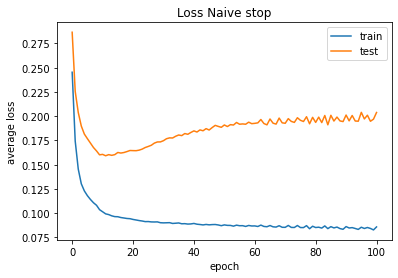

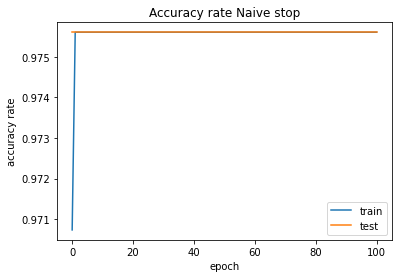

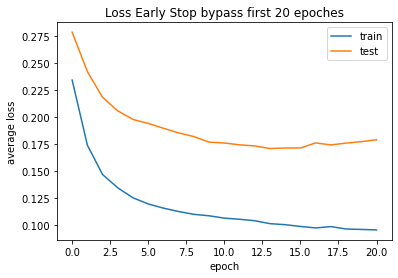

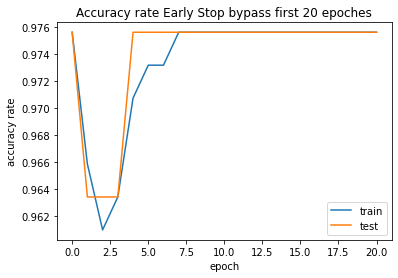

In [19]:
stopping_criterias=[stopping_criteria_naive,stopping_criteria_early_stop]
names=["Naive stop","Early Stop bypass first 20 epoches"]
networks_to_train=[network.copy(),network.copy()]
random_weights_for_layer1=initializer(output_layer1,input_layer1)
random_weights_for_layer2=initializer(output_layer2,input_layer2)
random_weights_for_outlayer=initializer(1,output_layer2)

print("lr: "+str(lr))
print("batch_size: "+str(batch_size))
print("num_epoch: "+str(num_epochs))
for i in range(len(stopping_criterias)):
    # make sure two criterias are running under same initial weights.
    cur_network=networks_to_train[i]
    cur_network[0].set_weight(random_weights_for_layer1)
    cur_network[2].set_weight(random_weights_for_layer2)
    cur_network[4].set_weight(random_weights_for_outlayer)

    print(names[i])
    print("="*20)
    totalstep,losses,acc=train(x_train,y_train,x_validate,y_validate,lr,batch_size,num_epochs,cur_network,bceLoss,stopping_criterias[i])
    print(totalstep)
    report_final_performance(losses,acc)
    draw(losses,acc,names[i])
    print(confusionMatrix(x_train,y_train,cur_network,sigmoid))
    print(confusionMatrix(x_validate,y_validate,cur_network,sigmoid))